In [1]:
"""
ECGR 5105 - Intro to Machine Learning
Homework 4 - Part 1
Phillip Harmon
"""
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
#Load and Build the Dataset
from sklearn.datasets import load_breast_cancer

loaded  = load_breast_cancer()

labels  = np.reshape(loaded.target, (len(loaded.target),1))
inputs  = pd.DataFrame(loaded.data)
names   = np.append(loaded.feature_names, 'label')

dataset = pd.DataFrame(np.concatenate([inputs,labels],axis=1))
dataset.columns = names

dataset


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  label  
0                  0.2654          0.4601                  0.11890    0.0  
1                  0.1860          0.2750                  0.08902    0.0  
2                  0.2430          0.3613                  0.08758    0.0  
3                  0.2575          0.6638                  0.17300    0.0  
4                  0.1625          0.2364                  0.07678   

In [3]:
#Sort and clean the Dataset
from sklearn.preprocessing import MinMaxScaler, StandardScaler

x = dataset.iloc[:,0:-1].values
y = dataset.iloc[:,-1].values

scaler = MinMaxScaler()
x = scaler.fit_transform(x)


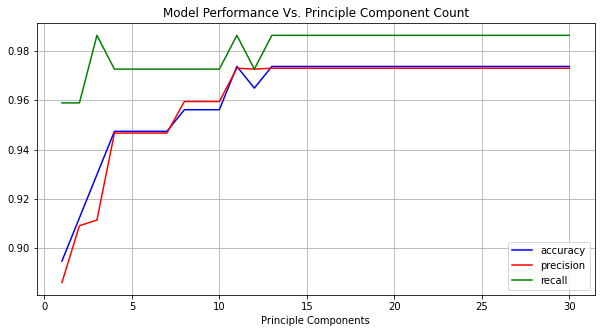

In [4]:
#Explore Default SVC with A range of PCA Component Counts
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

frameLog = []
modelLog = []
accuracyLog = []
precisionLog = []
recallLog = []
cols = []
maxPC = len(x[0])+1

for k in range(1,maxPC):
    
    pca = PCA(n_components = k)
    pcs = pca.fit_transform(x)
    cols.append('PC'+str(k))
    pcFrame = pd.DataFrame(data=pcs,columns=cols)
    frameLog.append(pcFrame)
    
    xt, xv, yt, yv = train_test_split(pcFrame, y,
                                      train_size = 0.8, test_size = 0.2,
                                      random_state=1337)
    
    model = SVC(random_state=1337)
    model.fit(xt,yt)
    modelLog.append(model)
    
    yp = model.predict(xv)
    accuracyLog.append(accuracy_score(yv,yp))
    precisionLog.append(precision_score(yv,yp))
    recallLog.append(recall_score(yv,yp))

plt.rcParams["figure.figsize"] = (10,5)
plt.grid()
plt.xlabel('Principle Components')
plt.title('Model Performance Vs. Principle Component Count')
plt.plot(range(1,maxPC),accuracyLog,color='blue',label='accuracy')
plt.plot(range(1,maxPC),precisionLog,color='red',label='precision')
plt.plot(range(1,maxPC),recallLog,color='green',label='recall')
plt.legend();


According to the plot above, the highest accuracy occurs at a lowest dimensionality of K=11


Classification Report for K=11
------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96        41
         1.0       0.97      0.99      0.98        73

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



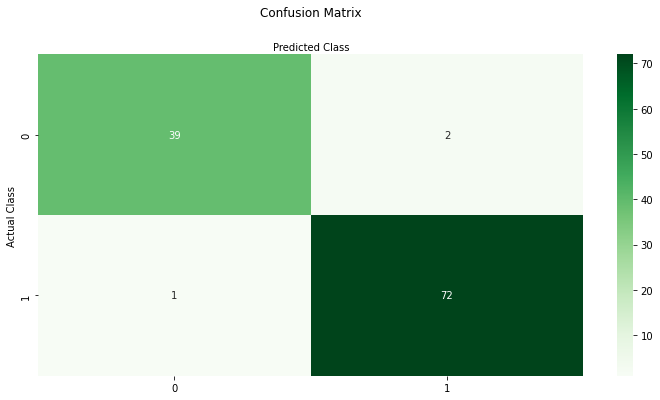

In [5]:
#Print Best Results
K = accuracyLog.index(max(accuracyLog))
print("According to the plot above, the highest accuracy occurs at a lowest dimensionality of K={}\n\n".format(K+1))
xt, xv, yt, yv = train_test_split(frameLog[K], y,train_size = 0.8, test_size = 0.2,random_state=1337)
yp = modelLog[K].predict(xv)
print("Classification Report for K={}".format(K+1))
print("------------------------------------------------------")
print(classification_report(yv,yp))

#Analyze using the Confusion Matrix
import seaborn as sns
classes = ['Benign','Malignant']
figure, axis = plt.subplots()
ticks = np.arange(len(classes))
plt.xticks(ticks, classes)
plt.yticks(ticks, classes)
sns.heatmap(pd.DataFrame(confusion_matrix(yv,yp)),
            annot=True, cmap="Greens", fmt='g')
axis.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()


In [6]:
#Refresh the Dataset
x = dataset.iloc[:,0:-1].values
y = dataset.iloc[:,-1].values

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

xt, xv, yt, yv = train_test_split(x, y,train_size = 0.8, test_size = 0.2,random_state=1337)

In [7]:
#Now to explore different Kernelizations and parameters
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

kernels = ['rbf','linear','sigmoid','poly']

parameters = {
    'pca__n_components' : range(1,len(x[0])+1),
    'svc__C'          : [1,2,3,4,5,6,7,8,9,10],
    'svc__gamma'      : [0.000001,0.00001,0.0001,0.001,'auto','scale']
}

pca = PCA(random_state=1337)

modelLog = dict()
accuracyLog = dict()
precisionLog = dict()
recallLog = dict()

for colonel in kernels:
    svc = SVC(kernel=colonel, random_state=1337)
    pipeline = make_pipeline(pca,svc)

    grid = GridSearchCV(pipeline,parameters)

    print("\n===========================================================================================================")
    print("Searching a variety of Parameters to find the best model with {}-type kernelization...\n".format(colonel))
    %time grid.fit(xt,yt)
    print("\nBest model among all parameter options for {}-type kernelization:".format(colonel))
    print(grid.best_params_)
    
    yp = grid.predict(xv)
    print("\nReport for Best Model Found for {}-type kernelization:".format(colonel))
    print("------------------------------------------------------")
    print(classification_report(yv,yp))
    print("Confusion Matrix:")
    print(confusion_matrix(yv,yp))
    
    modelLog[colonel] = grid
    accuracyLog[colonel] = accuracy_score(yv,yp)
    precisionLog[colonel] = precision_score(yv,yp)
    recallLog[colonel] = recall_score(yv,yp)



Searching a variety of Parameters to find the best model with rbf-type kernelization...

Wall time: 1min 36s

Best model among all parameter options for rbf-type kernelization:
{'pca__n_components': 7, 'svc__C': 7, 'svc__gamma': 'scale'}

Report for Best Model Found for rbf-type kernelization:
------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90        41
         1.0       0.95      0.95      0.95        73

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

Confusion Matrix:
[[37  4]
 [ 4 69]]

Searching a variety of Parameters to find the best model with linear-type kernelization...

Wall time: 42.8 s

Best model among all parameter options for linear-type kernelization:
{'pca__n_components': 8, 'svc__C': 3, 'svc__gamma': 1e-06}

Report for Best Model Found for linear-type

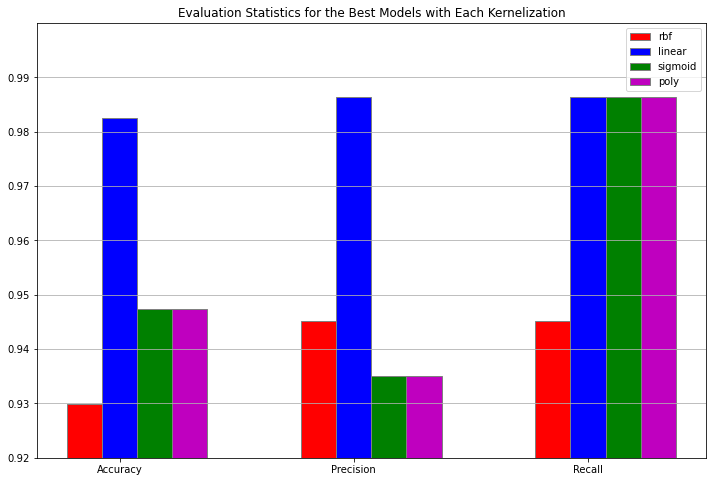

In [8]:
#Plot the results
w = 0.15
fig = plt.subplots(figsize = (12,8))

rbf = [accuracyLog['rbf'],precisionLog['rbf'],recallLog['rbf']]
linear = [accuracyLog['linear'],precisionLog['linear'],recallLog['linear']]
sigmoid = [accuracyLog['sigmoid'],precisionLog['sigmoid'],recallLog['sigmoid']]
poly = [accuracyLog['poly'],precisionLog['poly'],recallLog['poly']]

br1 = np.arange(len(rbf))
br2 = [wx + w for wx in br1]
br3 = [wx + w for wx in br2]
br4 = [wx + w for wx in br3]

plt.bar(br1, rbf, color='r', width=w, edgecolor='grey', label='rbf')
plt.bar(br2, linear, color='b', width=w, edgecolor='grey', label='linear')
plt.bar(br3, sigmoid, color='g', width=w, edgecolor='grey', label='sigmoid')
plt.bar(br4, poly, color='m', width=w, edgecolor='grey', label='poly')

plt.xticks([wx + w for wx in range(len(rbf))], ['Accuracy', 'Precision', 'Recall'])
yscale = 100
ylims = [int(yscale*min(accuracyLog.values())),yscale]
ytick = range(ylims[0],ylims[1])
plt.yticks([i/yscale for i in ytick])
plt.legend()
plt.title("Evaluation Statistics for the Best Models with Each Kernelization")
plt.ylim((ylims[0]/yscale,ylims[1]/yscale))
plt.grid(axis='y')
plt.show()


Classification Report
------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        41
         1.0       0.99      0.99      0.99        73

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



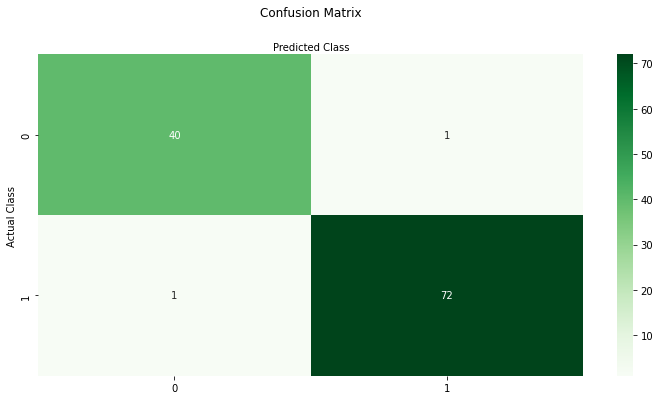

In [10]:
#Best model Analysis
model = modelLog['linear']

print("Classification Report")
print("------------------------------------------------------")
print(classification_report(yv,model.predict(xv)))

#Analyze using the Confusion Matrix
classes = ['Benign','Malignant']
figure, axis = plt.subplots()
ticks = np.arange(len(classes))
plt.xticks(ticks, classes)
plt.yticks(ticks, classes)
sns.heatmap(pd.DataFrame(confusion_matrix(yv,model.predict(xv))),
            annot=True, cmap="Greens", fmt='g')
axis.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class');
